# 🔍 AI Detective - Catching the Cyber Criminal! 🕵️‍♂️

Welcome, AI investigators! Your mission is to **catch the cybercriminal** behind a series of hacking attempts.

You will use **Decision Trees, Random Forests, and XGBoost** to analyze past cyber activities and predict future attacks.

**Let's begin! 🚀**


In [2]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

print('Libraries imported successfully! ✅')

Libraries imported successfully! ✅


In [3]:
import warnings
warnings.filterwarnings("ignore")

## 📂 Step 2: Load the Cyber Crime Dataset
Let's load the dataset and inspect the first few rows.

In [5]:
df = pd.read_csv('cyber_data.csv')
# dataset = pd.read_csv('cyber_data.csv', parse_dates=['timestamp'])
df.head()

,timestamp,user_id,network_speed,files_accessed,suspicious_score,attack_flag,device_type_Laptop,device_type_Mobile,device_type_Tablet
0,2024-01-01 00:00:00,1102,19,22,0.142137,0,1,0,0
1,2024-01-01 01:00:00,1435,25,18,0.011707,0,1,0,0
2,2024-01-01 02:00:00,1860,80,30,0.422034,0,0,1,0
3,2024-01-01 03:00:00,1270,26,4,0.295041,0,0,0,1
4,2024-01-01 04:00:00,1106,32,18,0.486000,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1000 non-null   object 
 1   user_id             1000 non-null   int64  
 2   network_speed       1000 non-null   int64  
 3   files_accessed      1000 non-null   int64  
 4   suspicious_score    1000 non-null   float64
 5   attack_flag         1000 non-null   int64  
 6   device_type_Laptop  1000 non-null   int64  
 7   device_type_Mobile  1000 non-null   int64  
 8   device_type_Tablet  1000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 70.4+ KB


## 📊 Step 3: Exploratory Data Analysis (EDA)
Let's analyze the dataset to understand the patterns of cyber crimes.

In [8]:
# Check for missing values
df.isnull().sum()

timestamp             0
user_id               0
network_speed         0
files_accessed        0
suspicious_score      0
attack_flag           0
device_type_Laptop    0
device_type_Mobile    0
device_type_Tablet    0
dtype: int64

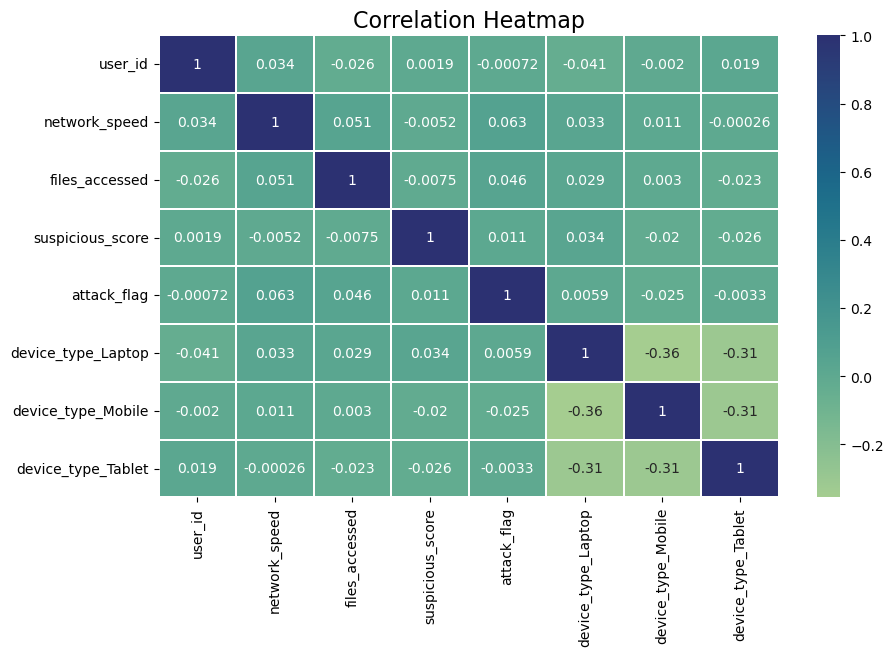

In [9]:
# Visualizing correlation heatmap
correlation_matrix = df.drop(['timestamp'], axis=1).corr()
plt.figure(figsize=(10, 6))
# heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.2)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## 🏗 Step 4: Prepare Data for Training
We need to split the data into training and testing sets.

In [11]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp']) # datatype: datetotime

# Extract useful time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day_of_month'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['week_of_year'] = df['timestamp'].dt.isocalendar().week
df['is_weekend'] = df['timestamp'].dt.dayofweek >= 5

# Drop the original timestamp column
df.drop(['timestamp'], axis=1, inplace=True)

# Define features and target
X = df.drop(['attack_flag'], axis=1)
y = df['attack_flag']

# train - test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Data split into training and testing sets successfully! ✅')

Data split into training and testing sets successfully! ✅


## 🌳 Step 5: Train a Decision Tree Model
Let's train a **Decision Tree Classifier** to predict cyber crimes.

In [13]:
# train the Decision Tree Classifier  
decisionTreeClassifier = DecisionTreeClassifier()

# train model using fit
decisionTreeClassifier.fit(X_train, y_train)

# predict on test set
y_pred_dt = decisionTreeClassifier.predict(X_test)

# calc accuracy
decisionTreeClassifier_accuracy = decisionTreeClassifier.score(X_test, y_test)
print('Decision Tree  Accuracy:', decisionTreeClassifier_accuracy)

# accuracy as a percentage
decisionTreeClassifier_accuracy = decisionTreeClassifier_accuracy * 100
print(f'{decisionTreeClassifier_accuracy} %')

Decision Tree  Accuracy: 0.7733333333333333
77.33333333333333 %


## 🌲 Step 6: Train a Random Forest Model
Let's improve our model using **Random Forest**.

In [15]:
# train the Random Forest Classifier 
randomForestClassifier = RandomForestClassifier(random_state=42)

# train model using fit
randomForestClassifier.fit(X_train, y_train)

# predict on test set
y_pred_rf = randomForestClassifier.predict(X_test)

# calc accuracy
randomForestClassifier_accuracy = randomForestClassifier.score(X_test, y_test)
print('Random Forest Accuracy:', randomForestClassifier_accuracy)

# accuracy as a percentage
randomForestClassifier_accuracy = randomForestClassifier_accuracy * 100
print(f'{randomForestClassifier_accuracy} %')

Random Forest Accuracy: 0.86
86.0 %


In [16]:
report = classification_report(y_test, y_pred_rf, output_dict=True)

report_df = pd.DataFrame(report).transpose()
print('\nClassification Report:')
report_df


Classification Report:


,precision,recall,f1-score,support
0,0.8600,1.00,0.924731,258.00
1,0.0000,0.00,0.000000,42.00
accuracy,0.8600,0.86,0.860000,0.86
macro avg,0.4300,0.50,0.462366,300.00
weighted avg,0.7396,0.86,0.795269,300.00


## ⚡ Step 7: Train an XGBoost Model
Let's use **XGBoost** for optimized performance.

In [18]:
!pip install xgboost

In [19]:
# train the XGBoost Classifier 
xGBClassifier = XGBClassifier(random_state=42)

# train model using fit
xGBClassifier.fit(X_train, y_train)

# predict on test set
y_pred_xgb = xGBClassifier.predict(X_test)

# calc accuracy
xGBClassifier_accuracy = randomForestClassifier.score(X_test, y_test)
print('XGBoost Accuracy:', xGBClassifier_accuracy)

# accuracy as a percentage
xGBClassifier_accuracy = xGBClassifier_accuracy * 100
print(f'{xGBClassifier_accuracy} %')

XGBoost Accuracy: 0.86
86.0 %


## 📊 Step 8: Compare Standard vs. Tuned Models
Let's analyze how hyperparameter tuning and model stacking affect performance.

In [21]:
model_results = {
    'Decision Tree': decisionTreeClassifier_accuracy,
    'Random Forest': randomForestClassifier_accuracy,
    'XGBoost': xGBClassifier_accuracy,
}

results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
results_df

,Model,Accuracy
0,Decision Tree,77.333333
1,Random Forest,86.000000
2,XGBoost,86.000000


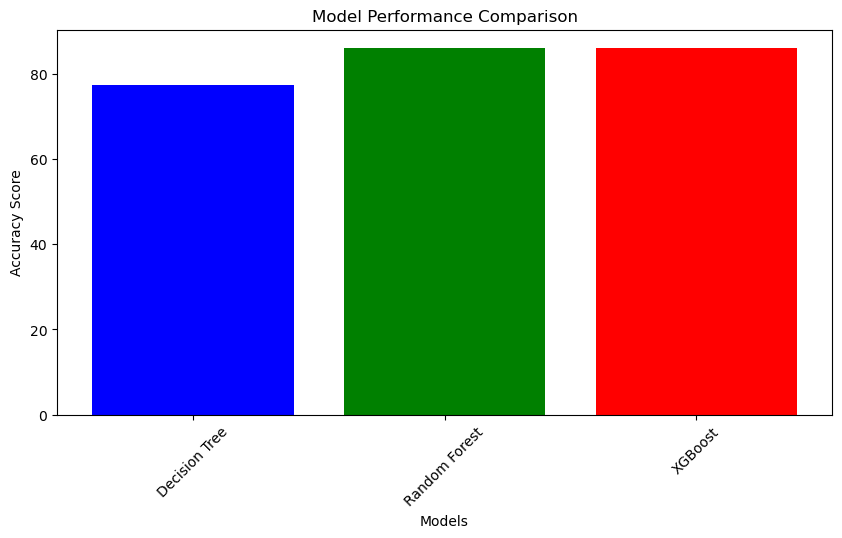

In [22]:
plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

## ⚙️ Step 9: Hyperparameter Tuning for Random Forest & XGBoost
Now let's **optimize** our models using GridSearchCV to find the best hyperparameters.

In [24]:
# Hyperparameter tuning for Random Forest 
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [1, 2, 4]
}

#  Random Forest Classifier
randomForestClassifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=randomForestClassifier, param_grid=params, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
best_rf_params = grid_search.best_params_
best_rf_accuracy = grid_search.best_score_

print('Best Random Forest Params:', best_rf_params)
print('Best Random Forest Accuracy:', best_rf_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=1, n_e

In [32]:
# accuracy as a percentage
best_rf_accuracy = best_rf_accuracy * 100
print(f'{best_rf_accuracy} %')

86.99999999999999 %


In [26]:
params = {
    'n_estimators': [50, 100, 200], #number of models we want to use
    'max_depth': [1, 3, 5],
    'eta': [0.1, 0.2, 0.3], #used to prevent overfitting by regularizing the weights of new features in each boosting step.
    'subsample': [0.6, 0.8, 1.0], # choose to provide only a percentage of the training data "sample rows"
    'colsample_bytree': [0.6, 0.8, 1.0] # how many features each tree gets to see at each iteration.
}

xGBClassifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xGBClassifier, param_grid=params, cv=5, n_jobs=-1, verbose=2) #utilize all available CPU cores
grid_search_xgb.fit(X_train, y_train)

# best parameters and accuracy
best_xgb_params = grid_search_xgb.best_params_
best_xgb_accuracy = grid_search_xgb.best_score_

print('Best XGBoost Params:', best_xgb_params)
print('Best XGBoost Accuracy:', best_xgb_accuracy)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Params: {'colsample_bytree': 1.0, 'eta': 0.3, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.6}
Best XGBoost Accuracy: 0.8728571428571428


In [34]:
# accuracy as a percentage
best_xgb_accuracy = best_xgb_accuracy * 100
print(f'{best_xgb_accuracy} %')

87.28571428571428 %


## 🔥 Step 10: Build a Stacked Model
Now that we have optimized our models, let's combine them into an **ensemble model**.

In [36]:
best_decision_tree = DecisionTreeClassifier(max_depth=1, min_samples_split=2, random_state=42)
best_random_forest = RandomForestClassifier(n_estimators=50, max_depth=1, min_samples_leaf=1, random_state=42)
best_xgboost = XGBClassifier(n_estimators=50, max_depth=1, learning_rate=0.3, subsample=0.6, colsample_bytree=1.0, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Voting Classifier
stacked_model = VotingClassifier(estimators=[
    ('decision_tree', best_decision_tree),
    ('random_forest', best_random_forest),
    ('xgboost', best_xgboost)
], voting='soft', n_jobs=-1)

# train
stacked_model.fit(X_train, y_train)

# predict
y_pred_stacked = stacked_model.predict(X_test)

# evaluate
stacked_model_accuracy = stacked_model.score(X_test, y_test) * 100
print('Stacked Model Accuracy:', stacked_model_accuracy, '%')

Stacked Model Accuracy: 86.0 %


## 📊 Step 11: Final Model Comparison
Let's compare all models, including the stacked model.

In [44]:
model_results = {
    'Decision Tree': decisionTreeClassifier_accuracy,
    'Random Forest': randomForestClassifier_accuracy,
    'XGBoost': xGBClassifier_accuracy,
    'Tuned RF': best_rf_accuracy,
    'Tuned XGBoost': best_xgb_accuracy,
    'Stacked Model': stacked_model_accuracy
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
sorted_results_df = results_df.sort_values(by="Accuracy")
print(sorted_results_df)

           Model   Accuracy
0  Decision Tree  77.333333
1  Random Forest  86.000000
2        XGBoost  86.000000
5  Stacked Model  86.000000
3       Tuned RF  87.000000
4  Tuned XGBoost  87.285714


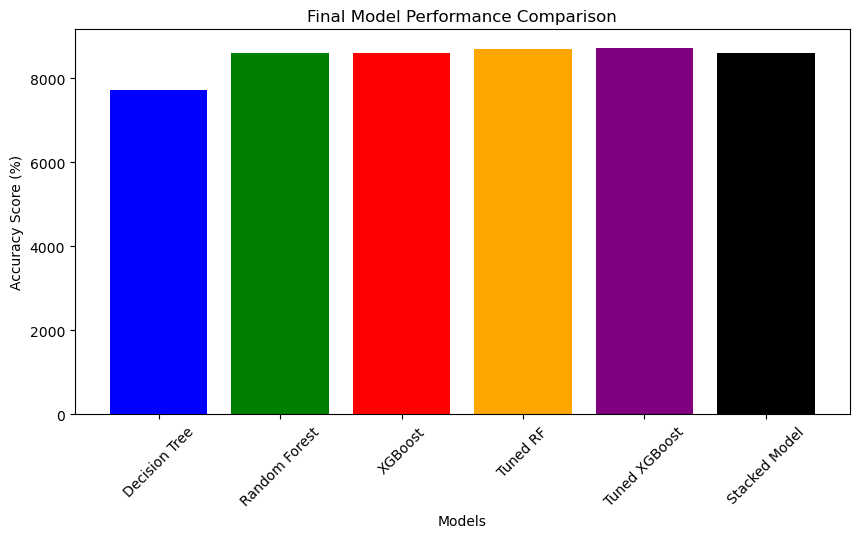

In [46]:

# Plot the accuracy scores
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Accuracy']*100, color=['blue', 'green', 'red', 'orange', 'purple', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.title('Final Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

## 📝 Step 12: Final Questions
Please answer the following questions in the markdown cell below: <br>
1. **Model Comparison:** Which model performed best? Why do you think it performed better? <br>
2. **Hyperparameter Tuning:** How much did tuning improve the performance of Random Forest and XGBoost? <br>
3. **Stacked Model:** Did the stacked model outperform individual models? Why or why not? <br>
4. **Feature Importance:** Which features were most important in predicting cybercrime? Use the feature importance of XGBoost to analyze this. <br>
5. **Real-World Application:** How can this approach be used in real-world cybersecurity? <br> 

📌 Write your answers in the markdown cell below.